In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/My Drive/Master Thesis/DeepRL

/content/gdrive/My Drive/Master Thesis/DeepRL


In [4]:
!ls -l

total 1134
drwx------ 2 root root   4096 Nov  8 12:06 agents
-rw------- 1 root root    422 Nov  8 13:24 Dockerfile
-rw------- 1 root root 533681 Nov  9 18:41 DQN_Cartpole.ipynb
-rw------- 1 root root 579984 Nov  9 18:52 DQN_Lunar_Lander.ipynb
drwx------ 2 root root   4096 Nov  8 12:06 DQN_trained_models
drwx------ 2 root root   4096 Nov  8 12:07 helpers
-rw------- 1 root root  31638 Nov  8 20:21 PG_Lunar_Lander.ipynb
-rw------- 1 root root    657 Nov  1 18:17 Presentation_1_Speaker_Notes.lnk
-rw------- 1 root root     48 Nov  8 11:59 README.md
-rw------- 1 root root     25 Nov  8 13:24 requirements.txt


In [5]:
!apt-get update -y && apt-get install -y xvfb && apt-get install -y python-opengl && apt-get install -y cmake && apt-get install -y zlib1g zlib1g-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.0 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [6]:
!pip install gym pyvirtualdisplay pyglet box2d-py atari_py pystan ipywidgets==7.6.5 jupyter_contrib_nbextensions

     |████████████████████████████████| 448 kB 5.4 MB/s 
     |████████████████████████████████| 20.9 MB 1.2 MB/s 
     |████████████████████████████████| 479 kB 50.5 MB/s 
     |████████████████████████████████| 861 kB 55.4 MB/s 
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963415 sha256=31295b298532955ad6a2c57f2e7e0cd31d469596711a978191667d6a40221a30
  Stored in directory: /root/.cache/pip/wheels/a0/95/26/4cf34fb92765c95fb7851fd447511594bcc3a50e504bd09af9
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465842 sha256=3361f3da08165f8d8f1c9000bbcfa271d32ae1ba50f90c2559f07d138f3206cb
  Stored in directory: /root/.cache/pip/wheels/8d/c4/b5/e4b61f624036f83566580d61f24af7b73180b1361ee1ab3722
Successfully built jupyter-latex-envs jupyter-nbextensions-configurator


## Imports

In [7]:
from agents.DQN_Agent import DQN_Agent
from helpers.plot_util import *

Create DQN_Agent

In [8]:
agent= DQN_Agent(
                 env_name='LunarLander-v2',
                 gamma=0.99,
                 epsilon=1.0,
                 layer1_size=128, 
                 layer2_size=64,    
                 lr=0.001, 
                 mem_size=1000000, 
                 batch_size=64,
                 epsilon_dec=0.0001,
                 epsilon_end=0.01,
                 reproduce_seed=None#42
                 )

# If you want to first train an agent use this cell ❎

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Eps: 395 ,  Eps steps: 300 ,Epsilon: 0.01, Ep_Reward : 251.93 , Average_Reward : 212.13
Mean Reward over last 100 ep more than 300

 Agent trained.....

 Saving Model info.....

 LunarLander-v2 Problem took 395 episodes


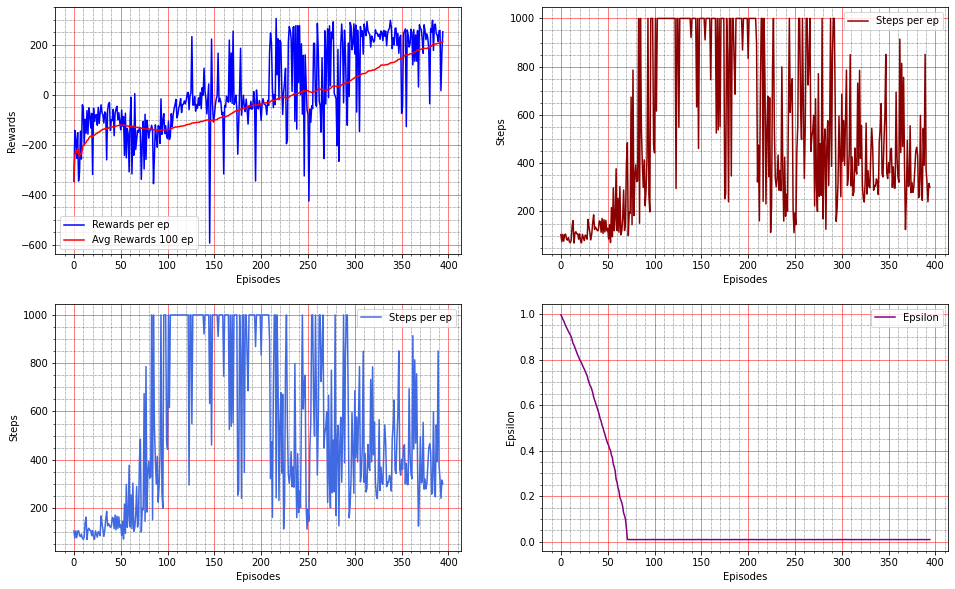

In [9]:
agent.train_multiple_episodes(num_episodes=500)    ## 500 was good hann tha toh acha kya kahte ho aap
model,book_keeping=agent.get_trained_model_info()
# plot Learning curve
learning_plot(book_keeping)

## Run this cell to check performance on 16 Test Cases

pyvirtualdisplay successfully imported
Tests # 42 , Rewards 276.5377776147957 , Steps 309
Tests # 900 , Rewards 262.59771544068906 , Steps 422
Tests # 930 , Rewards 272.2883978492598 , Steps 293
Tests # 180 , Rewards 224.48586087695082 , Steps 255
Tests # 660 , Rewards 255.09917247056504 , Steps 290
Tests # 240 , Rewards 238.57735961524799 , Steps 294
Tests # 960 , Rewards 283.3815468742245 , Steps 330
Tests # 450 , Rewards 279.8201642499598 , Steps 313
Tests # 30 , Rewards 240.18305243050978 , Steps 284
Tests # 90 , Rewards 103.90304944031584 , Steps 1000
Tests # 150 , Rewards 309.2837229612982 , Steps 293
Tests # 210 , Rewards 174.35550893160917 , Steps 376
Tests # 330 , Rewards 277.569285961369 , Steps 276
Tests # 420 , Rewards 207.6062591029025 , Steps 244
Tests # 510 , Rewards 269.0439149549203 , Steps 291
Tests # 75 , Rewards 291.84478611250034 , Steps 330


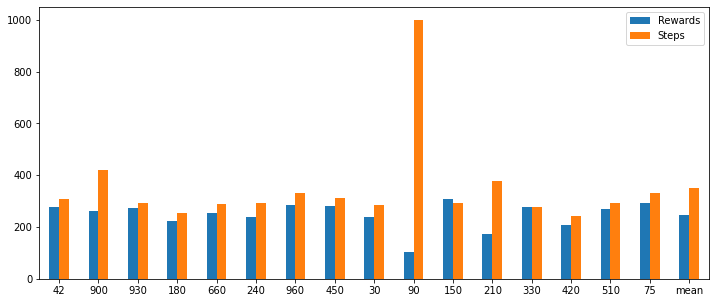

In [10]:
if agent.trained:
  test_cases_data,image_paths =agent.run_test_instances(case_list=[42,900,930,180,660,240,960,450,30,90,150,210,330,420,510,75], model_=model)
  # Plot Test cases data
  plot_test_cases(test_cases_data)

### Save the trained model manually

In [ ]:
agent.save_model()

DQN_trained_models/LunarLander-v2/dqn_model_20211107-181429.h5


# If you want to use a pretrained model use this cell ❎

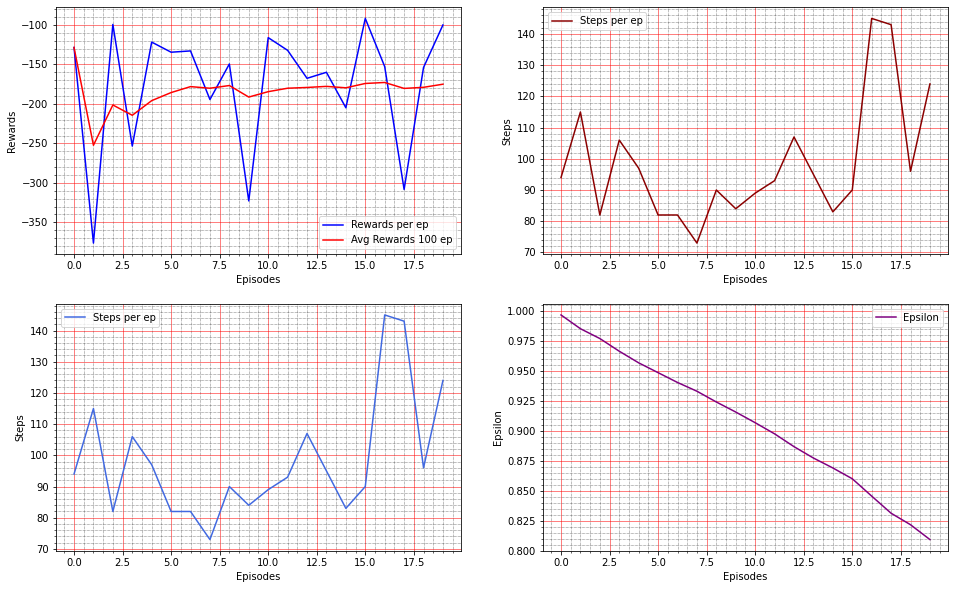

In [ ]:
if not agent.trained:
  # some of the best models 20211108-090112 ,  20211108-194625
  model_suffix="20211108-090112"
  model,book_keeping , image_paths = agent.load_pre_trained_model_info(timestr=model_suffix)
  # plot Learning curve
  learning_plot(book_keeping)

### Render the 16 Test Case gif's : ⏩

In [11]:
import IPython.display as display
import ipywidgets as widgets
from ipywidgets import GridspecLayout

rows=8
cols=4
grid = GridspecLayout(rows,cols)
index_of_img=0
for i in range(0,rows,2):
    for j in range(cols):
        
        path_of_img=image_paths[index_of_img]
        img=open(path_of_img,'rb').read()
        
        grid[i, j] = widgets.Image(value=img, format='gif', width=220, height=510)
        grid[i+1, j] = widgets.HTML(value=path_of_img[path_of_img.index('IMAGES/')+7 :])
        index_of_img+=1
        
        

grid

GridspecLayout(children=(Image(value=b'GIF89aX\x02\x90\x01\x83\x00\x00\x00\x00\x00\xcc\xcc\x0033ff3f3fffff33\x…